In [1]:
#Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data
train_data = pd.read_csv("train.csv")

# **Exploratory Data Analysis**

## **Examining the Data**

In [3]:
train_data.head(25)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1


In [4]:
train_data.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
dtype: object

In [5]:
train_data.shape

(19104, 13)

In [6]:
target = train_data[['Emp_ID','LastWorkingDate']]

In [7]:
target = target.dropna(subset = ['LastWorkingDate'])

In [8]:
target.shape

(1616, 2)

In [9]:
target.head()

,Emp_ID,LastWorkingDate
2,1,2016-03-11
9,4,2017-04-27
12,5,2016-03-07
20,8,2017-11-15
27,12,2016-12-21


In [10]:
train_data["Month_yr"] = pd.to_datetime(train_data['MMM-YY'],errors = 'coerce')

In [11]:
train_data['Age'].isna().sum()

0

## **Feature Engineering**

In [12]:
age = train_data.groupby('Emp_ID')['Age'].max().reset_index()

In [13]:
age.head()

,Emp_ID,Age
0,1,28
1,2,31
2,4,43
3,5,29
4,6,31


In [14]:
df_train = train_data.sort_values(['Emp_ID',"Month_yr"],ascending=False)

In [15]:
df_train.isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
Month_yr                    0
dtype: int64

In [16]:
df_train['months_before_Leaving']=df_train.groupby('Emp_ID').cumcount()+ 1

In [17]:
total_business = df_train.groupby('Emp_ID').agg({'Total Business Value': ['min', 'max','mean','median','sum'], 'Quarterly Rating': ['min','max'],'Salary':['min','max']}).reset_index()

In [18]:
total_business.head(5)

Emp_ID Total Business Value                                        \
                          min      max         mean median      sum   
0      1              -665480  2381060 571860.00000      0  1715580   
1      2                    0        0      0.00000      0        0   
2      4                    0   350000  70000.00000      0   350000   
3      5                    0   120360  40120.00000      0   120360   
4      6                    0  1265000 253000.00000      0  1265000   

  Quarterly Rating     Salary         
               min max    min    max  
0                2   2  57387  57387  
1                1   1  67016  67016  
2                1   1  65603  65603  
3                1   1  46368  46368  
4                1   2  78728  78728

In [19]:
df_train.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Month_yr,months_before_Leaving
19103,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2,2017-12-01,1
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,2017-11-01,2
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,2017-10-01,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,2017-09-01,4
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,2017-08-01,5
19098,2017-07-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,497690,3,2017-07-01,6
19097,2017-06-01,2788,29,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,1,2017-06-01,7
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1,2016-06-01,1
19095,2016-05-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,0,1,2016-05-01,2
19094,2016-04-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,0,1,2016-04-01,3


In [20]:
df_train['Month_yr'].max()

Timestamp('2017-12-01 00:00:00')

In [21]:
df_train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Month_yr',
       'months_before_Leaving'],
      dtype='object')

In [22]:
pivoted = df_train.pivot(index='Emp_ID',  columns='months_before_Leaving',values=['Total Business Value']).reset_index()

In [23]:
pivoted

Emp_ID Total Business Value                              \
months_before_Leaving                           1             2             3   
0                          1              0.00000 -665480.00000 2381060.00000   
1                          2              0.00000       0.00000           NaN   
2                          4              0.00000  350000.00000       0.00000   
3                          5              0.00000  120360.00000       0.00000   
4                          6              0.00000 1265000.00000       0.00000   
...                      ...                  ...           ...           ...   
2376                    2784         505480.00000       0.00000 3087830.00000   
2377                    2785              0.00000       0.00000       0.00000   
2378                    2786              0.00000       0.00000  318460.00000   
2379                    2787              0.00000       0.00000       0.00000   
2380                    2788         411480.00000  200420.00000       0.00000   

                                                                            \
months_before_Leaving            4             5            6            7   
0                              NaN           NaN          NaN          NaN   
1                              NaN           NaN          NaN          NaN   
2                          0.00000       0.00000          NaN          NaN   
3                              NaN           NaN          NaN          NaN   
4                          0.00000       0.00000          NaN          NaN   
...                            ...           ...          ...          ...   
2376                  400000.00000 1260090.00000 252000.00000 979270.00000   
2377                           NaN           NaN          NaN          NaN   
2378                       0.00000  387660.00000 432240.00000 970380.00000   
2379                  319740.00000  250000.00000 408090.00000          NaN   
2380                  448370.00000  740280.00000 497690.00000      0.00000   

                                                 ...               \
months_before_Leaving            8            9  ...           15   
0                              NaN          NaN  ...          NaN   
1                              NaN          NaN  ...          NaN   
2                              NaN          NaN  ...          NaN   
3                              NaN          NaN  ...          NaN   
4                              NaN          NaN  ...          NaN   
...                            ...          ...  ...          ...   
2376                  153800.00000 150260.00000  ... 990000.00000   
2377                           NaN          NaN  ...          NaN   
2378                  485270.00000 221080.00000  ...          NaN   
2379                           NaN          NaN  ...          NaN   
2380                           NaN          NaN  ...          NaN   

                                                                      \
months_before_Leaving           16           17           18      19   
0                              NaN          NaN          NaN     NaN   
1                              NaN          NaN          NaN     NaN   
2                              NaN          NaN          NaN     NaN   
3                              NaN          NaN          NaN     NaN   
4                              NaN          NaN          NaN     NaN   
...                            ...          ...          ...     ...   
2376                  271380.00000 270710.00000 102770.00000 0.00000   
2377                           NaN          NaN          NaN     NaN   
2378                           NaN          NaN          NaN     NaN   
2379                           NaN          NaN          NaN     NaN   
2380                           NaN          NaN          NaN     NaN   

                                                                            \
months_before_Leaving           20      

In [24]:
pivoted.columns

MultiIndex([(              'Emp_ID', ''),
            ('Total Business Value',  1),
            ('Total Business Value',  2),
            ('Total Business Value',  3),
            ('Total Business Value',  4),
            ('Total Business Value',  5),
            ('Total Business Value',  6),
            ('Total Business Value',  7),
            ('Total Business Value',  8),
            ('Total Business Value',  9),
            ('Total Business Value', 10),
            ('Total Business Value', 11),
            ('Total Business Value', 12),
            ('Total Business Value', 13),
            ('Total Business Value', 14),
            ('Total Business Value', 15),
            ('Total Business Value', 16),
            ('Total Business Value', 17),
            ('Total Business Value', 18),
            ('Total Business Value', 19),
            ('Total Business Value', 20),
            ('Total Business Value', 21),
            ('Total Business Value', 22),
            ('Total Business Value

In [25]:
pivoted.columns=[     'Emp_ID',
            'Total Business Value_ 1',
            'Total Business Value_ 2',
            'Total Business Value_ 3',
            'Total Business Value_ 4',
            'Total Business Value_ 5',
            'Total Business Value_ 6',
            'Total Business Value_ 7',
            'Total Business Value_ 8',
            'Total Business Value_ 9',
            'Total Business Value_10',
            'Total Business Value_11',
            'Total Business Value_12',
            'Total Business Value_13',
            'Total Business Value_14',
            'Total Business Value_15',
            'Total Business Value_16',
            'Total Business Value_17',
            'Total Business Value_18',
            'Total Business Value_19',
            'Total Business Value_20',
            'Total Business Value_21',
            'Total Business Value_22',
            'Total Business Value_23',
            'Total Business Value_24']

In [26]:
pivoted[['Emp_ID','Total Business Value_ 1',
            'Total Business Value_ 2',
            'Total Business Value_ 3',
            'Total Business Value_ 4',
            'Total Business Value_ 5',
            'Total Business Value_ 6']].isna().sum()

Emp_ID                        0
Total Business Value_ 1       0
Total Business Value_ 2     181
Total Business Value_ 3     384
Total Business Value_ 4     647
Total Business Value_ 5     892
Total Business Value_ 6    1201
dtype: int64

In [27]:
df_train['Total Business Value'].describe()

count      19104.00000
mean      571662.07496
std      1128312.21846
min     -6000000.00000
25%            0.00000
50%       250000.00000
75%       699700.00000
max     33747720.00000
Name: Total Business Value, dtype: float64

In [28]:
pivoted_new = pivoted[['Emp_ID','Total Business Value_ 1',
            'Total Business Value_ 2',
            'Total Business Value_ 3',
            'Total Business Value_ 4']]

In [29]:
pivoted_new = pivoted_new.fillna(0)

In [30]:
pivoted_new['change_m1_2']=pivoted['Total Business Value_ 2']-pivoted['Total Business Value_ 1']
pivoted_new['change_m2_3']=pivoted['Total Business Value_ 3']-pivoted['Total Business Value_ 2']
pivoted_new['change_m3_4']=pivoted['Total Business Value_ 4']-pivoted['Total Business Value_ 3']

In [31]:
pivoted.shape

(2381, 25)

In [32]:
age.shape

(2381, 2)

In [33]:
merged_1 = pd.merge(pivoted_new,age, on='Emp_ID', how = 'inner')

In [34]:
merged_2 = pd.merge(merged_1,target, on ='Emp_ID', how='left')

In [35]:
merged_2.shape

(2381, 10)

In [36]:
merged_2.head()

,Emp_ID,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,Total Business Value_ 4,change_m1_2,change_m2_3,change_m3_4,Age,LastWorkingDate
0,1,0.00000,-665480.00000,2381060.00000,0.00000,-665480.00000,3046540.00000,NaN,28,2016-03-11
1,2,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,31,NaN
2,4,0.00000,350000.00000,0.00000,0.00000,350000.00000,-350000.00000,0.00000,43,2017-04-27
3,5,0.00000,120360.00000,0.00000,0.00000,120360.00000,-120360.00000,NaN,29,2016-03-07
4,6,0.00000,1265000.00000,0.00000,0.00000,1265000.00000,-1265000.00000,0.00000,31,NaN


In [37]:
merged_2.columns

Index(['Emp_ID', 'Total Business Value_ 1', 'Total Business Value_ 2',
       'Total Business Value_ 3', 'Total Business Value_ 4', 'change_m1_2',
       'change_m2_3', 'change_m3_4', 'Age', 'LastWorkingDate'],
      dtype='object')

In [38]:
merged_2['Left'] = np.where(pd.isna(merged_2['LastWorkingDate']),0,1)

In [39]:
merged_2.head()

,Emp_ID,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,Total Business Value_ 4,change_m1_2,change_m2_3,change_m3_4,Age,LastWorkingDate,Left
0,1,0.00000,-665480.00000,2381060.00000,0.00000,-665480.00000,3046540.00000,NaN,28,2016-03-11,1
1,2,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,31,NaN,0
2,4,0.00000,350000.00000,0.00000,0.00000,350000.00000,-350000.00000,0.00000,43,2017-04-27,1
3,5,0.00000,120360.00000,0.00000,0.00000,120360.00000,-120360.00000,NaN,29,2016-03-07,1
4,6,0.00000,1265000.00000,0.00000,0.00000,1265000.00000,-1265000.00000,0.00000,31,NaN,0


In [40]:
merged_2.dtypes

Emp_ID                       int64
Total Business Value_ 1    float64
Total Business Value_ 2    float64
Total Business Value_ 3    float64
Total Business Value_ 4    float64
change_m1_2                float64
change_m2_3                float64
change_m3_4                float64
Age                          int64
LastWorkingDate             object
Left                         int32
dtype: object

In [41]:
merged_2.shape

(2381, 11)

In [42]:
df_train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Month_yr',
       'months_before_Leaving'],
      dtype='object')

In [43]:
abc = df_train[['Emp_ID', 'Gender', 'City', 'Education_Level',
       'Dateofjoining','Joining Designation',
       'Designation']].drop_duplicates(subset='Emp_ID')

In [44]:
abc.shape

(2381, 7)

In [45]:
merged_2 = pd.merge(abc,merged_2,on='Emp_ID', how= 'inner')

In [46]:
merged_2.shape

(2381, 17)

In [47]:
merged_2['Dateofjoining']= pd.to_datetime(merged_2['Dateofjoining'],errors='coerce')

In [48]:
max_date = pd.to_datetime('2018-01-01',errors='coerce')

In [49]:
merged_2['LWD'] = np.where(pd.isna(merged_2['LastWorkingDate']),max_date,merged_2['LastWorkingDate'])

In [50]:
merged_2.dtypes

Emp_ID                              int64
Gender                             object
City                               object
Education_Level                    object
Dateofjoining              datetime64[ns]
Joining Designation                 int64
Designation                         int64
Total Business Value_ 1           float64
Total Business Value_ 2           float64
Total Business Value_ 3           float64
Total Business Value_ 4           float64
change_m1_2                       float64
change_m2_3                       float64
change_m3_4                       float64
Age                                 int64
LastWorkingDate                    object
Left                                int32
LWD                        datetime64[ns]
dtype: object

In [51]:
merged_2['tenure'] = (merged_2['LWD']-merged_2['Dateofjoining'])/np.timedelta64(1, 'M')

In [52]:
merged_2.isna().sum().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 384,
       647,   0, 765,   0,   0,   0], dtype=int64)

In [53]:
merged_2.shape

(2381, 19)

In [54]:
merged_2

,Emp_ID,Gender,City,Education_Level,Dateofjoining,Joining Designation,Designation,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,Total Business Value_ 4,change_m1_2,change_m2_3,change_m3_4,Age,LastWorkingDate,Left,LWD,tenure
0,2788,Male,C27,Master,2017-06-08,2,2,411480.00000,200420.00000,0.00000,448370.00000,-211060.00000,-200420.00000,448370.00000,30,NaN,0,2018-01-01,6.80096
1,2787,Female,C20,Master,2015-07-21,1,1,0.00000,0.00000,0.00000,319740.00000,0.00000,0.00000,319740.00000,28,2016-06-20,1,2016-06-20,11.00639
2,2786,Male,C19,College,2015-07-31,2,2,0.00000,0.00000,318460.00000,0.00000,0.00000,318460.00000,-318460.00000,45,2016-09-22,1,2016-09-22,13.76620
3,2785,Female,C9,College,2017-08-28,1,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,34,2017-10-28,1,2017-10-28,2.00415
4,2784,Male,C24,College,2012-10-15,2,3,505480.00000,0.00000,3087830.00000,400000.00000,-505480.00000,3087830.00000,-2687830.00000,34,NaN,0,2018-01-01,62.55570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,6,Female,C11,Bachelor,2017-07-31,3,3,0.00000,1265000.00000,0.00000,0.00000,1265000.00000,-1265000.00000,0.00000,31,NaN,0,2018-01-01,5.05965
2377,5,Male,C9,College,2016-01-09,1,1,0.00000,120360.00000,0.00000,0.00000,120360.00000,-120360.00000,NaN,29,2016-03-07,1,2016-03-07,1.90558
2378,4,Male,C13,Master,2016-12-07,2,2,0.00000,350000.00000,0.00000,0.00000,350000.00000,-350000.00000,0.00000,43,2017-04-27,1,2017-04-27,4.63254
2379,2,Male,C7,Master,2017-11-06,2,2,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,31,NaN,0,2018-01-01,1.83987


In [55]:
merged_2['LWD']

0      2018-01-01
1      2016-06-20
2      2016-09-22
3      2017-10-28
4      2018-01-01
          ...    
2376   2018-01-01
2377   2016-03-07
2378   2017-04-27
2379   2018-01-01
2380   2016-03-11
Name: LWD, Length: 2381, dtype: datetime64[ns]

### **Transforming Date and Time**

In [56]:
import datetime

In [57]:
merged_2['day_of_year'] = merged_2.LWD.dt.dayofyear
merged_2['day'] = merged_2.LWD.dt.day
merged_2['month'] = merged_2.LWD.dt.month
#M2['year'] = M2.LWD.dt.year
merged_2['quarter'] = merged_2.LWD.dt.quarter
merged_2.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,Joining Designation,Designation,Total Business Value_ 1,Total Business Value_ 2,Total Business Value_ 3,...,change_m3_4,Age,LastWorkingDate,Left,LWD,tenure,day_of_year,day,month,quarter
0,2788,Male,C27,Master,2017-06-08,2,2,411480.00000,200420.00000,0.00000,...,448370.00000,30,NaN,0,2018-01-01,6.80096,1,1,1,1
1,2787,Female,C20,Master,2015-07-21,1,1,0.00000,0.00000,0.00000,...,319740.00000,28,2016-06-20,1,2016-06-20,11.00639,172,20,6,2
2,2786,Male,C19,College,2015-07-31,2,2,0.00000,0.00000,318460.00000,...,-318460.00000,45,2016-09-22,1,2016-09-22,13.76620,266,22,9,3
3,2785,Female,C9,College,2017-08-28,1,1,0.00000,0.00000,0.00000,...,NaN,34,2017-10-28,1,2017-10-28,2.00415,301,28,10,4
4,2784,Male,C24,College,2012-10-15,2,3,505480.00000,0.00000,3087830.00000,...,-2687830.00000,34,NaN,0,2018-01-01,62.55570,1,1,1,1


In [58]:
merged_2['Is_month_start'] = pd.to_datetime(merged_2['LWD']).dt.is_month_start 
merged_2['Is_month_end'] = pd.to_datetime(merged_2['LWD']).dt.is_month_end 
merged_2['Is_quarter_start'] = pd.to_datetime(merged_2['LWD']).dt.is_quarter_start
merged_2['Is_quarter_end'] = pd.to_datetime(merged_2['LWD']).dt.is_quarter_end 
merged_2['Is_year_start'] = pd.to_datetime(merged_2['LWD']).dt.is_year_start 
merged_2['Is_year_end'] = pd.to_datetime(merged_2['LWD']).dt.is_year_end

In [59]:
total_business.columns=['Emp_ID', 'Total Business Value_min',
            'Total Business Value_max',
            'Total Business Value_mean',
            'Total Business Value_median',
            'Total Business Value_sum',
                'Quarterly Rating_min',
                'Quarterly Rating_max',
                          'Salary_min',
                          'Salary_max']

In [60]:
final_merge = pd.merge(total_business,merged_2,on='Emp_ID', how='inner')

In [61]:
final_merge.isna().sum()

Emp_ID                           0
Total Business Value_min         0
Total Business Value_max         0
Total Business Value_mean        0
Total Business Value_median      0
Total Business Value_sum         0
Quarterly Rating_min             0
Quarterly Rating_max             0
Salary_min                       0
Salary_max                       0
Gender                           0
City                             0
Education_Level                  0
Dateofjoining                    0
Joining Designation              0
Designation                      0
Total Business Value_ 1          0
Total Business Value_ 2          0
Total Business Value_ 3          0
Total Business Value_ 4          0
change_m1_2                    181
change_m2_3                    384
change_m3_4                    647
Age                              0
LastWorkingDate                765
Left                             0
LWD                              0
tenure                           0
day_of_year         

In [62]:
final_merge_new = final_merge.drop(labels=['LastWorkingDate','Dateofjoining','LWD'], axis=1)

In [63]:
final_merge_new = final_merge_new.fillna(0)

In [64]:
df2_train = pd.get_dummies(final_merge_new)

In [65]:
df2_train.shape

(2381, 66)

In [66]:
df2_train.isna().sum()

Emp_ID                         0
Total Business Value_min       0
Total Business Value_max       0
Total Business Value_mean      0
Total Business Value_median    0
                              ..
City_C8                        0
City_C9                        0
Education_Level_Bachelor       0
Education_Level_College        0
Education_Level_Master         0
Length: 66, dtype: int64

In [67]:
df2_train.columns

Index(['Emp_ID', 'Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_mean', 'Total Business Value_median',
       'Total Business Value_sum', 'Quarterly Rating_min',
       'Quarterly Rating_max', 'Salary_min', 'Salary_max',
       'Joining Designation', 'Designation', 'Total Business Value_ 1',
       'Total Business Value_ 2', 'Total Business Value_ 3',
       'Total Business Value_ 4', 'change_m1_2', 'change_m2_3', 'change_m3_4',
       'Age', 'Left', 'tenure', 'day_of_year', 'day', 'month', 'quarter',
       'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end',
       'Is_year_start', 'Is_year_end', 'Gender_Female', 'Gender_Male',
       'City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14',
       'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
       'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25',
       'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City

In [68]:
df2_train['tenure']=df2_train['tenure'].astype('int64')

In [69]:
df2_train.head()

,Emp_ID,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,1,-665480,2381060,571860.00000,0,1715580,2,2,57387,57387,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.00000,0,0,1,1,67016,67016,...,0,0,0,0,1,0,0,0,0,1
2,4,0,350000,70000.00000,0,350000,1,1,65603,65603,...,0,0,0,0,0,0,0,0,0,1
3,5,0,120360,40120.00000,0,120360,1,1,46368,46368,...,0,0,0,0,0,0,1,0,1,0
4,6,0,1265000,253000.00000,0,1265000,1,2,78728,78728,...,0,0,0,0,0,0,0,1,0,0


# **Building model with new data set**

In [70]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df2_train.drop(labels=['Left','Emp_ID'], axis=1)
y = df2_train['Left'].values


# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=0)

In [71]:
X.columns

Index(['Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_mean', 'Total Business Value_median',
       'Total Business Value_sum', 'Quarterly Rating_min',
       'Quarterly Rating_max', 'Salary_min', 'Salary_max',
       'Joining Designation', 'Designation', 'Total Business Value_ 1',
       'Total Business Value_ 2', 'Total Business Value_ 3',
       'Total Business Value_ 4', 'change_m1_2', 'change_m2_3', 'change_m3_4',
       'Age', 'tenure', 'day_of_year', 'day', 'month', 'quarter',
       'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end',
       'Is_year_start', 'Is_year_end', 'Gender_Female', 'Gender_Male',
       'City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14',
       'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
       'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25',
       'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4',
       'City

# **ML Application**

In [72]:
# Outlier detection
from sklearn.ensemble import IsolationForest

outliers = IsolationForest(random_state=0).fit_predict(X)
outliers_index = list(np.where(outliers == -1)[0])

print(f"Outlier Count: {len(outliers_index)} \nSample Count: {len(df2_train)} \nFraction: {round(len(outliers_index)/len(df2_train),3)}")


Outlier Count: 52 
Sample Count: 2381 
Fraction: 0.022


## **Exploring different models**

### **Logistic Regression Model**

In [73]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.792


### **Random Forest** 

In [74]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.998


### **Support Vector Machine**

In [75]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.776


# **Hyper-Parameter Tuning with Cross-Validation**

## **10 Fold Cross Validation**
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest and SVM model.

In [76]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Random Forest Classifier: 0.999


In [77]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for SVM Classifier: 0.785


In [78]:
#For Log Regression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Logistic Regression Classifier: %.3f" % (results.mean()))

10-fold cross validation average accuracy for Logistic Regression Classifier: 0.821


From the Cross Validation results we observe that the average accuracy remains very close to the Random Forest & Logistics Regression model accuracy; hence, we can conclude that the models generalize well.

### **Precision and Recall**
We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [79]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       335
           1       1.00      1.00      1.00       618

    accuracy                           1.00       953
   macro avg       1.00      1.00      1.00       953
weighted avg       1.00      1.00      1.00       953



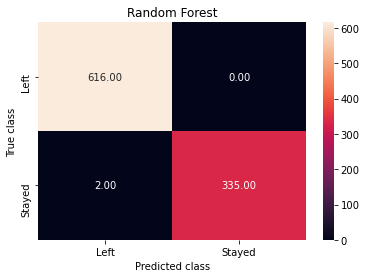

In [80]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [81]:
#PRScores for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63       335
           1       0.78      0.95      0.86       618

    accuracy                           0.79       953
   macro avg       0.81      0.73      0.74       953
weighted avg       0.80      0.79      0.78       953



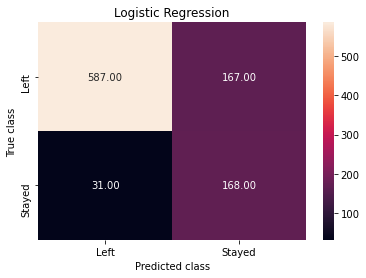

In [82]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [83]:
#PR scores for SVM
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.44      0.58       335
           1       0.76      0.96      0.85       618

    accuracy                           0.78       953
   macro avg       0.81      0.70      0.71       953
weighted avg       0.79      0.78      0.75       953



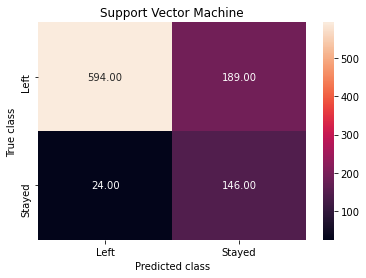

In [84]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

# **ROC Curve**

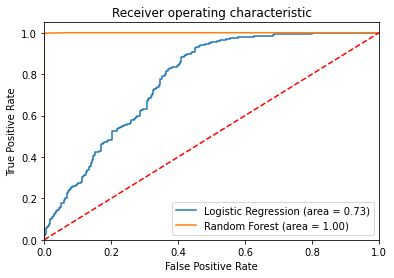

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for logistic regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

## **Variable Importance for Random Forest Classifier**
According to our Random Forest model, the the most important features which influence whether to leave the company, in ascending order are as follows:

In [86]:
X.columns

Index(['Total Business Value_min', 'Total Business Value_max',
       'Total Business Value_mean', 'Total Business Value_median',
       'Total Business Value_sum', 'Quarterly Rating_min',
       'Quarterly Rating_max', 'Salary_min', 'Salary_max',
       'Joining Designation', 'Designation', 'Total Business Value_ 1',
       'Total Business Value_ 2', 'Total Business Value_ 3',
       'Total Business Value_ 4', 'change_m1_2', 'change_m2_3', 'change_m3_4',
       'Age', 'tenure', 'day_of_year', 'day', 'month', 'quarter',
       'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end',
       'Is_year_start', 'Is_year_end', 'Gender_Female', 'Gender_Male',
       'City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14',
       'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
       'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25',
       'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4',
       'City

In [87]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp.head(25)

Is_year_start                 0.18702
Is_quarter_start              0.16270
day                           0.16147
day_of_year                   0.16063
Is_month_start                0.10236
month                         0.09642
quarter                       0.03661
Total Business Value_ 1       0.02724
change_m1_2                   0.01870
Total Business Value_mean     0.00791
Total Business Value_sum      0.00685
Total Business Value_ 2       0.00405
Total Business Value_max      0.00403
Quarterly Rating_max          0.00380
Total Business Value_median   0.00278
tenure                        0.00267
Salary_max                    0.00252
Total Business Value_ 4       0.00205
Total Business Value_ 3       0.00168
Salary_min                    0.00125
Total Business Value_min      0.00119
Designation                   0.00119
Joining Designation           0.00108
Age                           0.00076
Quarterly Rating_min          0.00047
dtype: float64

<AxesSubplot:>

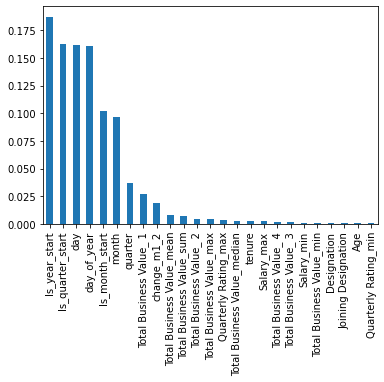

In [88]:
feature_imp.nlargest(25).plot(kind='bar')

In [89]:
X['Score']=logreg.predict(X)

In [90]:
X['Score_Probs']=logreg.predict_proba(X.drop(columns='Score'))[:,1]

In [91]:
X.head(10)

,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,Joining Designation,...,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Score,Score_Probs
0,-665480,2381060,571860.00000,0,1715580,2,2,57387,57387,1,...,0,0,0,0,0,0,0,1,1,1.00000
1,0,0,0.00000,0,0,1,1,67016,67016,2,...,0,0,1,0,0,0,0,1,1,0.75714
2,0,350000,70000.00000,0,350000,1,1,65603,65603,2,...,0,0,0,0,0,0,0,1,1,0.76242
3,0,120360,40120.00000,0,120360,1,1,46368,46368,1,...,0,0,0,0,1,0,1,0,1,0.71831
4,0,1265000,253000.00000,0,1265000,1,2,78728,78728,3,...,0,0,0,0,0,1,0,0,1,0.82153
5,0,0,0.00000,0,0,1,1,70656,70656,3,...,0,0,0,0,0,0,1,0,1,0.76834
6,0,0,0.00000,0,0,1,1,42172,42172,1,...,0,0,0,0,0,0,0,1,1,0.67162
7,0,1707180,434530.00000,200000,2607180,1,4,28116,28116,1,...,0,0,0,0,0,0,0,1,1,0.94428
8,0,1719680,444045.21739,258610,10213040,1,2,119227,119227,1,...,0,0,0,0,0,0,0,1,1,0.87541
9,0,0,0.00000,0,0,1,1,19734,19734,3,...,0,0,0,0,0,0,1,0,1,0.58293


In [92]:
concat_empid = pd.concat([df2_train[['Emp_ID']],X],axis=1)

In [93]:
concat_empid.shape

(2381, 67)

In [94]:
concat_empid.head()

,Emp_ID,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,...,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Score,Score_Probs
0,1,-665480,2381060,571860.00000,0,1715580,2,2,57387,57387,...,0,0,0,0,0,0,0,1,1,1.00000
1,2,0,0,0.00000,0,0,1,1,67016,67016,...,0,0,1,0,0,0,0,1,1,0.75714
2,4,0,350000,70000.00000,0,350000,1,1,65603,65603,...,0,0,0,0,0,0,0,1,1,0.76242
3,5,0,120360,40120.00000,0,120360,1,1,46368,46368,...,0,0,0,0,1,0,1,0,1,0.71831
4,6,0,1265000,253000.00000,0,1265000,1,2,78728,78728,...,0,0,0,0,0,1,0,0,1,0.82153


In [95]:
# Importing test data
test_data = pd.read_csv("test.csv")

In [96]:
test_data.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [97]:
test_data.shape

(741, 1)

In [98]:
df_test= pd.merge(concat_empid,test_data,on='Emp_ID', how='inner')

In [99]:
df_test[df_test['Score']==1].head(25)

,Emp_ID,Total Business Value_min,Total Business Value_max,Total Business Value_mean,Total Business Value_median,Total Business Value_sum,Quarterly Rating_min,Quarterly Rating_max,Salary_min,Salary_max,...,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Score,Score_Probs
0,2,0,0,0.00000,0,0,1,1,67016,67016,...,0,0,1,0,0,0,0,1,1,0.75714
1,6,0,1265000,253000.00000,0,1265000,1,2,78728,78728,...,0,0,0,0,0,1,0,0,1,0.82153
2,11,0,0,0.00000,0,0,1,1,42172,42172,...,0,0,0,0,0,0,0,1,1,0.67162
3,14,0,0,0.00000,0,0,1,1,19734,19734,...,0,0,0,0,0,0,1,0,1,0.58293
7,39,150470,966340,484446.00000,554010,2422230,2,3,72888,72888,...,0,0,0,0,0,0,1,0,1,0.90710
12,54,0,14620880,1879071.66667,657215,33823290,1,4,117993,127826,...,0,0,0,0,0,1,0,0,1,0.92694
15,62,0,0,0.00000,0,0,1,1,62376,62376,...,0,0,0,0,1,0,0,1,1,0.74237
19,72,0,193580,64526.66667,0,193580,1,1,42242,42242,...,0,0,0,0,0,0,0,1,1,0.55091
22,80,0,153300,51100.00000,0,153300,1,1,56687,56687,...,0,0,1,0,0,0,1,0,1,0.63554
23,85,0,0,0.00000,0,0,1,1,49509,49509,...,0,0,0,0,0,0,0,1,1,0.69847


In [100]:
df_test.shape

(741, 67)

# **Submission**

In [101]:
final_sub = pd.DataFrame({"Emp_ID":df_test['Emp_ID'],'Target':df_test['Score']})

In [102]:
final_sub.tail()

,Emp_ID,Target
736,2775,1
737,2778,1
738,2781,0
739,2784,0
740,2788,1


In [103]:
final_sub.to_csv("final_submission.csv",index=False)